In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/lustre/scratch117/cellgen/team297/kt16/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1


In [2]:
# read in the processed file
processed_file = 'out/prostate.h5ad'
raw_file = 'out/prostate_raw.h5ad'
rawcounts_file = 'out/prostate-rawcounts.h5ad'
rawcounts_soupx_file = 'out/prostate-raw_soupx.h5ad'
adata1 = sc.read_h5ad(processed_file)
adata2 = sc.read_h5ad(raw_file)
adata3 = sc.read_h5ad(rawcounts_file)
adata4 = sc.read_h5ad(rawcounts_soupx_file)

In [3]:
# scaled counts
adata1

AnnData object with n_obs × n_vars = 17108 × 1487
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'Biopsy Location DETAIL', 'Biopsy Location BRIEF', 'Biopsy Location Co-ordinate', 'PMHx', 'celltype-immune'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype-immune_colors', 'celltype_colors', 'dendrogram_leiden', 'group_colors', 'leiden', 'leiden_colors', 'neighbors', 'patient_colors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [4]:
# normalized counts
adata2

AnnData object with n_obs × n_vars = 17108 × 21955
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'celltype_colors', 'dendrogram_leiden', 'group_colors', 'leiden', 'leiden_colors', 'neighbors', 'patient_colors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [5]:
# raw counts
adata3

AnnData object with n_obs × n_vars = 17108 × 33538
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'Biopsy Location DETAIL', 'Biopsy Location BRIEF', 'Biopsy Location Co-ordinate', 'PMHx', 'celltype-immune'
    var: 'gene_ids', 'feature_types'
    uns: 'celltype-immune_colors', 'celltype_colors', 'dendrogram_leiden', 'group_colors', 'leiden', 'leiden_colors', 'neighbors', 'patient_colors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [6]:
# soupx raw 'counts'
adata4

AnnData object with n_obs × n_vars = 17108 × 33538
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'Biopsy Location DETAIL', 'Biopsy Location BRIEF', 'Biopsy Location Co-ordinate', 'PMHx', 'celltype-immune'
    var: 'gene_ids', 'feature_types'
    uns: 'celltype-immune_colors', 'celltype_colors', 'dendrogram_leiden', 'group_colors', 'leiden', 'leiden_colors', 'neighbors', 'patient_colors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [7]:
# read in the mnp file
mnp_file = 'out/mnp.integrated.h5ad'
mnp = sc.read_h5ad(mnp_file)
mnp

AnnData object with n_obs × n_vars = 793 × 3000
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'cohort', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'celltype-immune'
    var: 'gene_ids', 'feature_types'
    uns: 'celltype-immune_colors', 'cohort_colors', 'dendrogram_celltype-immune', 'dendrogram_leiden', 'group_colors', 'leiden', 'leiden_colors', 'neighbors', 'patient_colors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

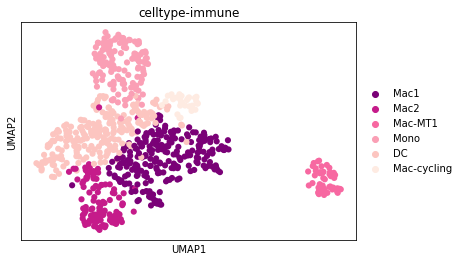

In [8]:
sc.pl.umap(mnp, color = 'celltype-immune')

In [9]:
# read in the lymphoid file
lymphoid_file = 'out/lymphoid.h5ad'
lymphoid = sc.read_h5ad(lymphoid_file)
lymphoid

AnnData object with n_obs × n_vars = 1694 × 2178
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'Treg_score', 'CD4 NV/CM rest_score', 'CD4/CD8 rest_score', 'IFN Response_score', 'Proliferation_score', 'CD8 Cytotoxic_score', 'CD8 Cytokine_score', 'CD69+Trm_score', 'CD69-Trm_score', 'Trm_score', 'Tcm/Tem_score', 'GSE41867 Chronic-acute CD8+ Up_score', 'GSE41870 CD8+ LCMV Chronic-Acute UP_score', 'GSE9650 Chronic vs acute LCMV-specific CD8 T cells_score', 'celltype-immune', 'celltype-immune_group', 'K562_score', 'ADCC_score', 'cytokine_score', 'common_score', '__is_in_cluster__'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype-immune_colors', 'celltype_colors', 'dendro

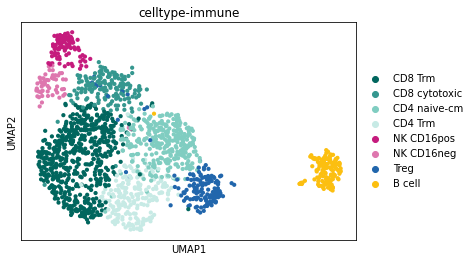

In [10]:
sc.pl.umap(lymphoid, color = 'celltype-immune')

In [11]:
# transfer the mnp labels to the processed mnp file using a dictionary approach
mnp_dict = dict(zip(mnp.obs.index, mnp.obs['celltype-immune']))
lymphoid_dict = dict(zip(lymphoid.obs.index, lymphoid.obs['celltype-immune']))
len(mnp_dict)

793

In [12]:
# combine the two immune dict
mnp_dict.update(lymphoid_dict)
len(mnp_dict)

2487

In [13]:
# create a dict for current processed celltype
adata_dict = dict(zip(adata1.obs.index, adata1.obs['celltype']))
len(adata_dict)

17108

In [14]:
# update the adata_dict with mnp_dict
adata_dict.update(mnp_dict)
len(adata_dict)

17382

In [15]:
# overwrite the celltype-immune column
adata1.obs['celltype-immune'] = adata1.obs['celltype-immune'].astype('object')
adata1.obs['celltype-immune'].update(pd.Series(adata_dict))
adata1

AnnData object with n_obs × n_vars = 17108 × 1487
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'Biopsy Location DETAIL', 'Biopsy Location BRIEF', 'Biopsy Location Co-ordinate', 'PMHx', 'celltype-immune'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype-immune_colors', 'celltype_colors', 'dendrogram_leiden', 'group_colors', 'leiden', 'leiden_colors', 'neighbors', 'patient_colors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [16]:
# keep the current colors
color_dict = dict(zip(adata1.obs['celltype'].cat.categories, adata1.uns['celltype_colors']))
color_dict.update(dict(zip(mnp.obs['celltype-immune'].cat.categories, mnp.uns['celltype-immune_colors'])))
color_dict.update(dict(zip(lymphoid.obs['celltype-immune'].cat.categories, lymphoid.uns['celltype-immune_colors'])))

In [17]:
color_dict

{'BE': '#1c4481',
 'HE': '#60688d',
 'CE': '#1f77b4',
 'LE-KLK3': '#5b8ba1',
 'LE-KLK4': '#b4d5de',
 'Fibroblast': '#59a14f',
 'Endothelial': '#8cd17d',
 'MNP': '#c7233b',
 'Mast cell': '#d37295',
 'NK cell': '#ff9d9a',
 'T cell': '#f28e2b',
 'B cell': '#fcbf10',
 'Sperm': '#727272',
 'Mac1': '#7a0177',
 'Mac2': '#c51b8a',
 'Mac-MT1': '#f768a1',
 'Mono': '#fa9fb5',
 'DC': '#fcc5c0',
 'Mac-cycling': '#feebe2',
 'CD8 Trm': '#01665e',
 'CD8 cytotoxic': '#35978f',
 'CD4 naive-cm': '#80cdc1',
 'CD4 Trm': '#c7eae5',
 'NK CD16pos': '#c51b7d',
 'NK CD16neg': '#de77ae',
 'Treg': '#2166ac'}

... storing 'celltype-immune' as categorical


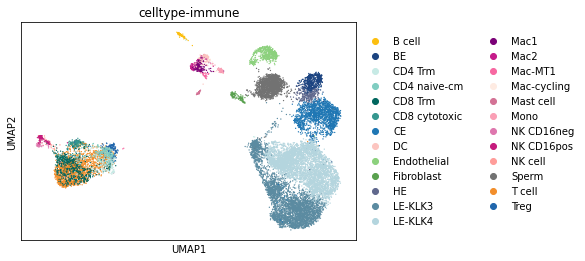

In [18]:
sc.pl.umap(adata1, color = 'celltype-immune', palette = color_dict)

In [19]:
# transfer over
adata2.obs = adata1.obs.copy()
adata3.obs = adata1.obs.copy()
adata4.obs = adata1.obs.copy()

adata2.uns = adata1.uns.copy()
adata3.uns = adata1.uns.copy()
adata4.uns = adata1.uns.copy()

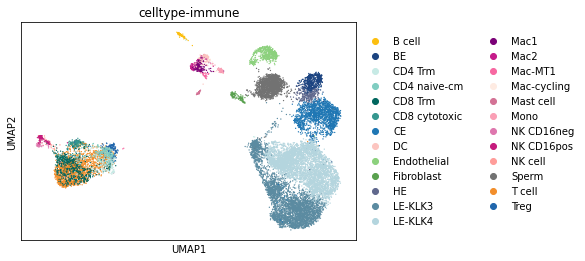

In [20]:
sc.pl.umap(adata2, color = 'celltype-immune')

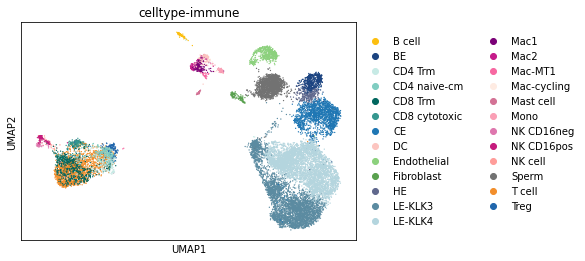

In [21]:
sc.pl.umap(adata3, color = 'celltype-immune')

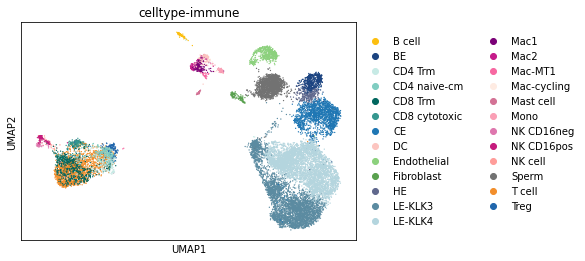

In [22]:
sc.pl.umap(adata4, color = 'celltype-immune')

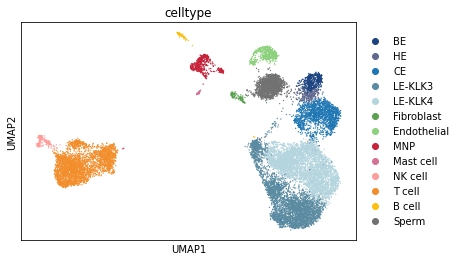

In [23]:
sc.pl.umap(adata1, color = 'celltype')

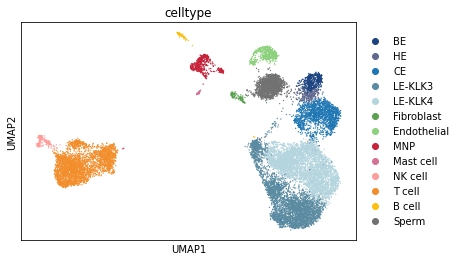

In [24]:
sc.pl.umap(adata2, color = 'celltype')

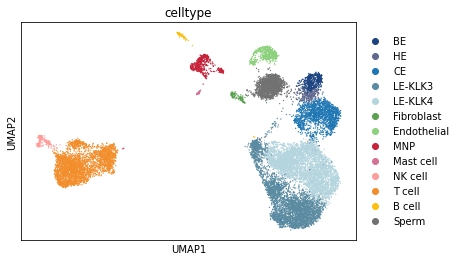

In [25]:
sc.pl.umap(adata3, color = 'celltype')

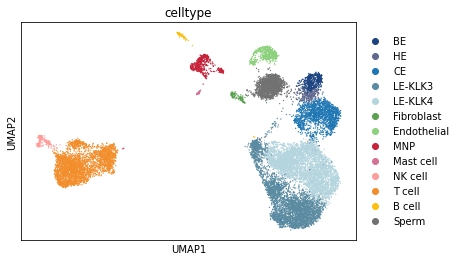

In [26]:
sc.pl.umap(adata4, color = 'celltype')

In [27]:
# save
adata1.write_h5ad('out/prostate_220621.h5ad', compression = 'gzip')
adata2.write_h5ad('out/prostate_norm_220621.h5ad', compression = 'gzip')
adata3.write_h5ad('out/prostate-rawcounts_220621.h5ad', compression = 'gzip')
adata4.write_h5ad('out/prostate-raw_soupx_220621.h5ad', compression = 'gzip')